<a href="https://colab.research.google.com/github/marcin-tarka/notebooks/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple notebook to play with mnist dataset and Keras.

In [65]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [66]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Printing random train example of index 58319


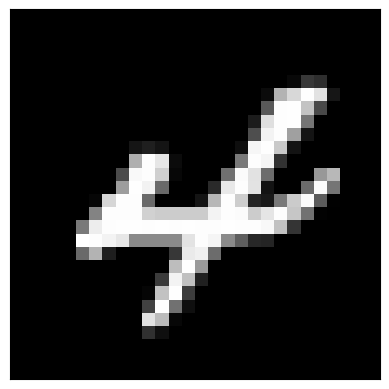

In [67]:
import matplotlib.pyplot as plt
import random

def print_img(img_array):
  plt.imshow(img_array, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

rand = random.randint(0, x_train.shape[0]-1)
print("Printing random train example of index", rand)
print_img(x_train[rand])

In [71]:
# Preprocess the data
x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255

In [93]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                50240     
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.9927 - accuracy: 0.6709 - val_loss: 0.5140 - val_accuracy: 0.8508
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4973 - accuracy: 0.8485 - val_loss: 0.3528 - val_accuracy: 0.8958
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3914 - accuracy: 0.8836 - val_loss: 0.2915 - val_accuracy: 0.9130
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3410 - accuracy: 0.8984 - val_loss: 0.2527 - val_accuracy: 0.9253
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2996 - accuracy: 0.9125 - val_loss: 0.2280 - val_accuracy: 0.9310
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2649 - accuracy: 0.9216 - val_loss: 0.2091 - val_accuracy: 0.9375
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2375 - accuracy: 0.9301 - val_loss: 0.1862 - val_accuracy:

In [95]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Test loss: 0.18375730514526367
Test accuracy: 0.9434000253677368
